In [9]:
# warning 무시하기
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
dataset = pd.read_csv("Salary_Data.csv")

In [10]:
dataset

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [11]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

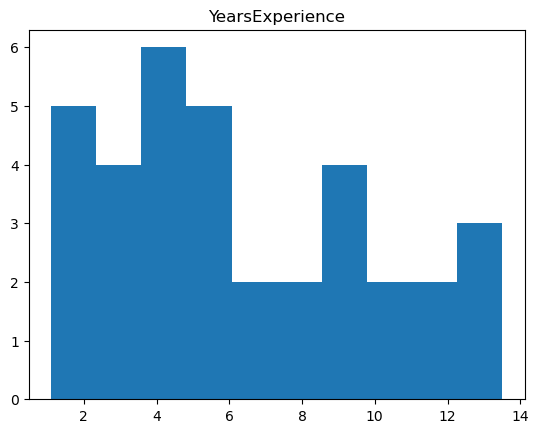

In [12]:
dataset.describe()
plt.hist(dataset['YearsExperience'])
plt.title('YearsExperience')
plt.show()

In [13]:
X=dataset[['Salary']]

In [14]:
Y=dataset[['YearsExperience']]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.25,random_state=42)

In [16]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = (1,)))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________


In [19]:
N_EPOCHS = 70
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/70
1/1 [==============================] - 2s 2s/step - loss: 104843488.0000 - mse: 104843488.0000 - val_loss: 44232888.0000 - val_mse: 44232888.0000
Epoch 2/70
1/1 [==============================] - 0s 57ms/step - loss: 42785300.0000 - mse: 42785300.0000 - val_loss: 32530262.0000 - val_mse: 32530262.0000
Epoch 3/70
1/1 [==============================] - 0s 47ms/step - loss: 31464876.0000 - mse: 31464876.0000 - val_loss: 24192586.0000 - val_mse: 24192586.0000
Epoch 4/70
1/1 [==============================] - 0s 45ms/step - loss: 23399598.0000 - mse: 23399598.0000 - val_loss: 18012606.0000 - val_mse: 18012606.0000
Epoch 5/70
1/1 [==============================] - 0s 53ms/step - loss: 17421620.0000 - mse: 17421620.0000 - val_loss: 13351391.0000 - val_mse: 13351391.0000
Epoch 6/70
1/1 [==============================] - 0s 94ms/step - loss: 12912841.0000 - mse: 12912841.0000 - val_loss: 9814408.0000 - val_mse: 9814408.0000
Epoch 7/70
1/1 [==============================] - 0s 48ms/st

Epoch 60/70
1/1 [==============================] - 0s 51ms/step - loss: 1.7082 - mse: 1.7082 - val_loss: 0.9662 - val_mse: 0.9662
Epoch 61/70
1/1 [==============================] - 0s 72ms/step - loss: 1.7091 - mse: 1.7091 - val_loss: 0.9662 - val_mse: 0.9662
Epoch 62/70
1/1 [==============================] - 0s 68ms/step - loss: 1.7085 - mse: 1.7085 - val_loss: 0.9661 - val_mse: 0.9661
Epoch 63/70
1/1 [==============================] - 0s 55ms/step - loss: 1.7086 - mse: 1.7086 - val_loss: 0.9661 - val_mse: 0.9661
Epoch 64/70
1/1 [==============================] - 0s 74ms/step - loss: 1.7089 - mse: 1.7089 - val_loss: 0.9663 - val_mse: 0.9663
Epoch 65/70
1/1 [==============================] - 0s 82ms/step - loss: 1.7090 - mse: 1.7090 - val_loss: 0.9663 - val_mse: 0.9663
Epoch 66/70
1/1 [==============================] - 0s 56ms/step - loss: 1.7089 - mse: 1.7089 - val_loss: 0.9663 - val_mse: 0.9663
Epoch 67/70
1/1 [==============================] - 0s 67ms/step - loss: 1.7080 - mse: 1.70

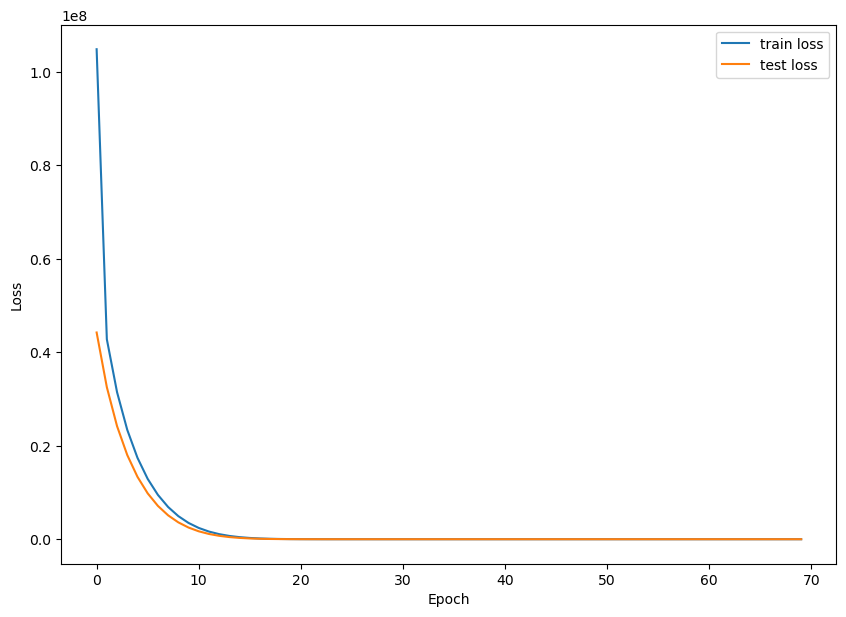

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

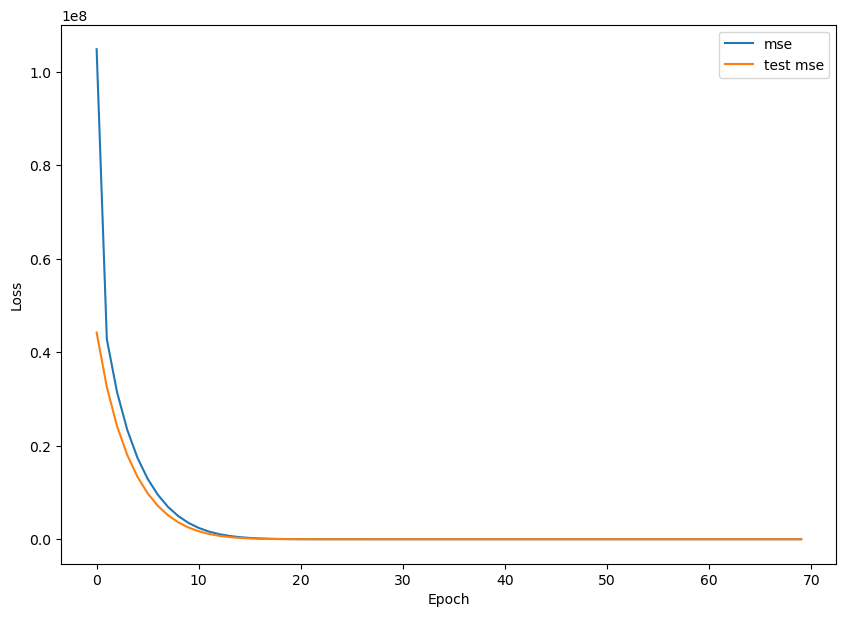

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
test_mse_score, test_mae_score=model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 63ms/step - loss: 0.9663 - mse: 0.9663
